In [ ]:
# 기본 옵션
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

# library 불러오기
library(stringr)

In [ ]:
no <- 1:4
name <- c("Apple","Banana","Peach","Berry")
price <- c(500,200,200,50)
qty <- c(5,4,3,2)

In [ ]:
fruit <- data.frame(번호=no,제품=name,금액=price,수량=qty)

In [ ]:
# 메모리 형태로 파일 보관
save(fruit,no,name,file = "Data/Fruit.txt")

# 파일 불러오기
load("Data/Fruit.txt")

# fruit를 csv로 저장
write.csv(fruit,"Data/fruit.csv",row.names=F)

### 세계 GDP 순위 데이터 정제 및 차트 만들기

In [ ]:
GDP_ranking <- read.csv("Data/GDP.csv")

In [ ]:
# 데이터 삭제
GDP <- GDP_ranking[,-c(3,6)]
GDP <- GDP[-4:-1,]

# 상위 15개국 선별
GDP_top15 <- GDP[1:15,]

# Column 이름 정의
colnames(GDP_top15) <- c("Code","Ranking","Nation","GDP")

In [ ]:
# Row 이름 새로 구성
rownames(GDP_top15) <- c()

In [ ]:
GDP_top15$GDP <- as.numeric(str_replace_all(GDP_top15$GDP,",",""))

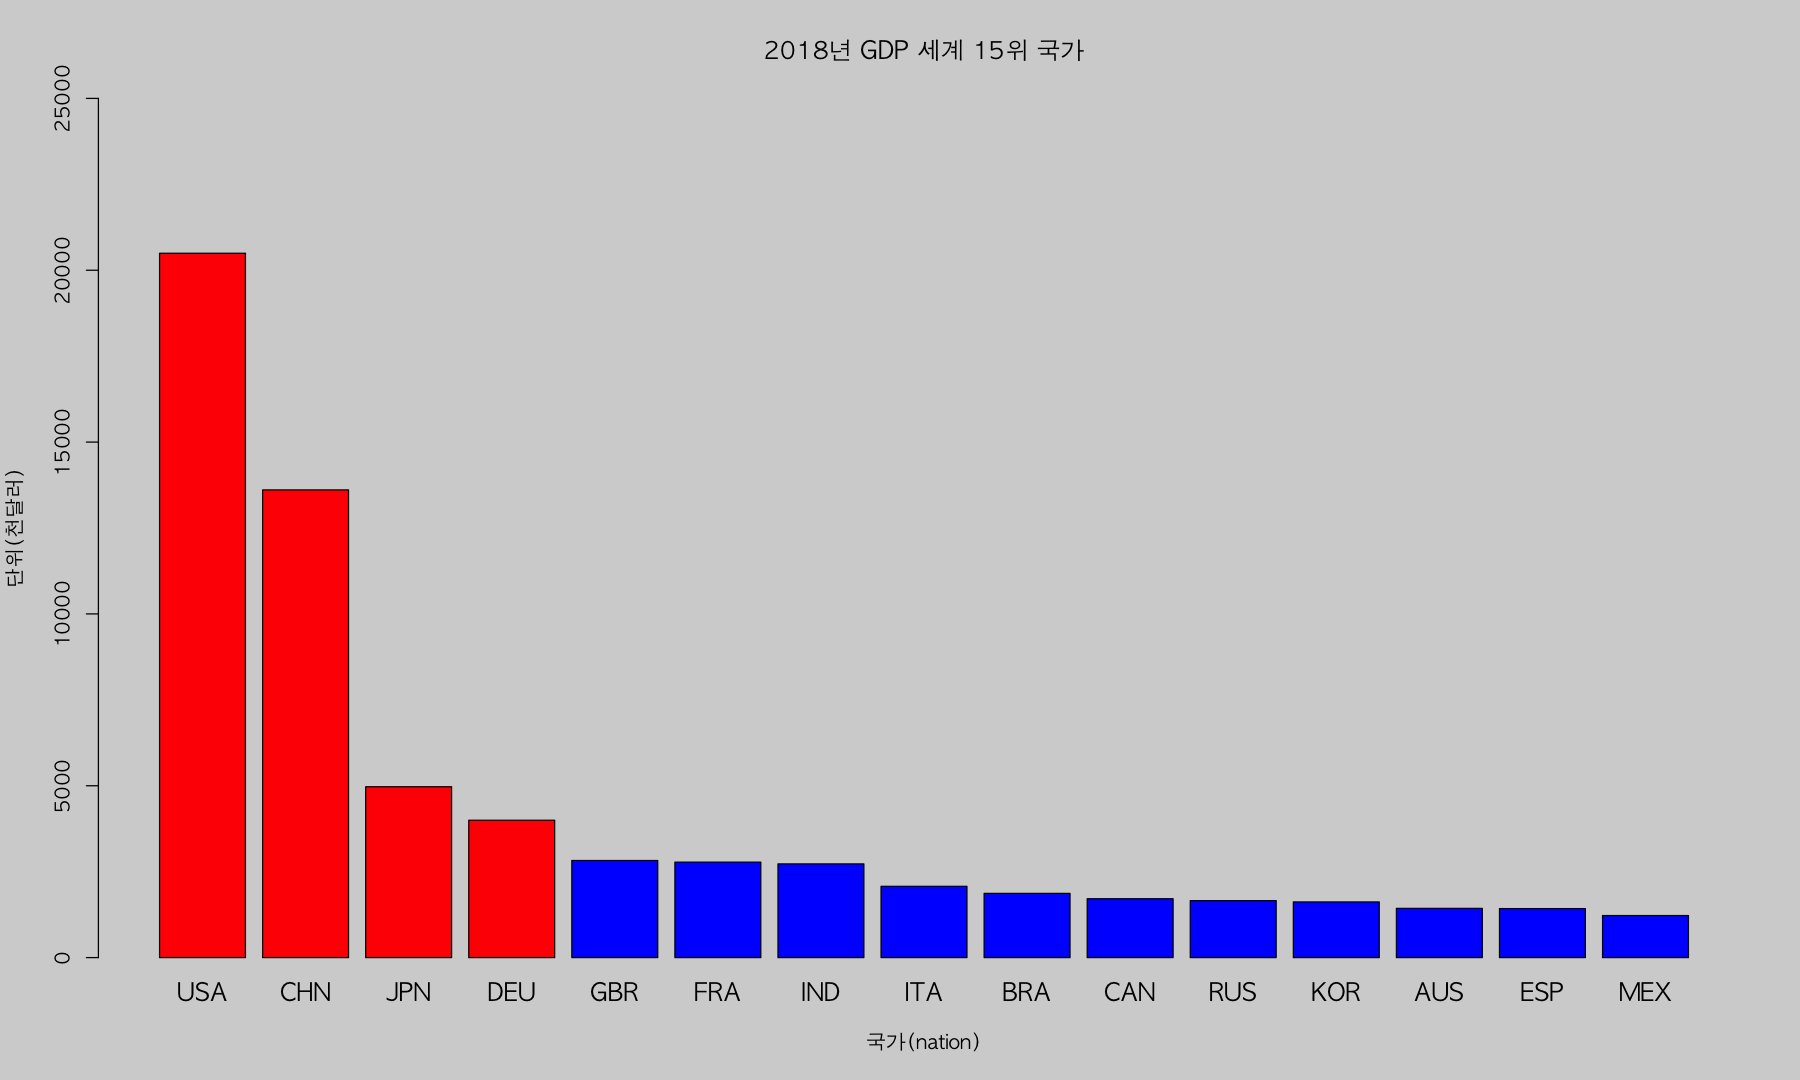

In [394]:
par(family = "AppleGothic", bg = 'lightgrey')
barplot(
    GDP_top15$GDP / 1000, # Data
    main = "2018년 GDP 세계 15위 국가", # main Title
    xlab = "국가(nation)", # x축 이름
    ylab = "단위(천달러)", # y축 이름
    col = ifelse(GDP_top15$GDP / 1000 >= 3000, "RED","BLUE"), # color
    names = GDP_top15$Code,
    cex.names = 1.2,
    ylim = c(0,25000)
)

In [ ]:
# 미국,중국,한국 : 빨간색, 그, 이외 국가는 파란색으로 표현
ifelse(is.element(GDP_top15$Code,c("USA","KOR","CHN")),"Red","BLUE")
ifelse(GDP_top15$Code == "USA"|GDP_top15$Code == "KOR"|GDP_top15$Code == "CHN","Red","BLUE")
ifelse(GDP_top15$Code == c('USA','CHN''KOR'),"RED","BLUE")

# GDP가 3,000,000 이상인 국가만 빨간색으로 표시
ifelse(GDP_top15$GDP / 1000 >= 3000, "RED","BLUE")

---
# 데이터 처리

In [ ]:
# 데이터 정렬
# install.packages("dplyr")
library("dplyr")

In [ ]:
# Sepal.Length 기준으로 오름차순 정렬
# arrange() : dplyr
head(arrange(iris,Sepal.Length))

# Sepal.Length 기준으로 오름차순 정렬 후 1열과 2열만 보기
head(arrange(iris[,1:2],Sepal.Length))

# Sepal.Length 기준으로 오름차순 정렬 후 동일한 크기를 가진 데이터 발생 시 Petal.Length 기준으로 오름차순 정렬
head(arrange(iris,Sepal.Length,Petal.Length))

# Sepal.Length 기준으로 내림차순 정렬
head(arrange(iris,desc(Sepal.Length)))

In [ ]:
# Sampling(중복값을 허용하지 않음) -> target의 숫자가 동일해야함
samp <- sample(1:nrow(iris),nrow(iris)*0.7)
irisTrain <- iris[samp,]

In [ ]:
# 동일 데이터로 Training을 위함
set.seed(1234)

# iris는 이미 정렬이 되어있으므로 Target 각각의 숫자를 동일하게 표본집단 추출, 모집단의 70%는 Training, 30%는 Test
samp <- c(sample(1:50,35),sample(51:100,35),sample(101:150,35))
irisTrain <- iris[samp,]

# Test
irisTest <- iris[-samp,]

# 표본집단들의 중앙값,평균 확인 -> 정규분포를 이루는지
summary(irisTrain)
summary(irisTest)

In [ ]:
# 모집단에서 필요한 데이터만 추출
# iris에서 Species = setosa 만 추출하여 iris_setosa 라는 data.frame 생성
iris_setosa <- subset(iris,Species == 'setosa')

# Species가 3종류가 추출되었기에 조정필요
str(iris_setosa)

# factor 조정
iris_setosa$Species <- factor(iris_setosa$Species)

In [ ]:
# iris에서 Species가 versicolor 인것만 추출하여 iris_versicolor라는 data.frame 생성
iris_versicolor <- subset(iris,Species == 'versicolor')
rownames(iris_versicolor) <- c()
iris_versicolor$Species <- factor(iris_versicolor$Species)

In [ ]:
# iris에서 Species가 setosa이고, Sepal.Length가 5보다 큰 자료만 추출
iris_setosa_5 <- subset(iris,Species == 'setosa' & Sepal.Length > 5)
rownames(iris_setosa_5) <- c()
iris_setosa_5$Species <- factor(iris_setosa_5$Species)

In [ ]:
# subset으로 컬럼 지우기
subset(iris,select = -Species)

## 그룹 연산 함수

In [ ]:
# iris에서 Species별로 Sepal.width의 평균
mean(subset(iris,Species == 'setosa')$Sepal.Width)

aggregate(Sepal.Width ~ Species, iris, mean)

In [ ]:
seoul <- read.csv("Data/newSeoul.csv")

# 컬럼별 데이터 확인

In [ ]:
# NA 확인
sum(is.na(seoul))

# 컬럼별 결측치 확인
for(i in 1:ncol(seoul)) {
    cat(colnames(seoul[i]), ":" ,sum(is.na(seoul[,i])),"\n")
}

colSums(is.na(seoul))

# 컬럼별 데이터 갯수 확인
table(seoul$년도)

In [ ]:
# 자치구 별 발생건수의 평균
regionAcc.mean <- aggregate(발생건수 ~ 자치구명,seoul,mean)
arrange(regionAcc.mean,desc(발생건수))

# 자치구 별 발생건수의 표준편차
regionAcc.sd <- aggregate(발생건수 ~ 자치구명,seoul,sd)

# 자치구별의 발생건수의 변동계수
# 변동계수 = 표준편차 / 평균
regionAcc.cv <- regionAcc.sd$발생건수/ regionAcc.mean$발생건수

# 자치구명과 변동계수를 가진 DataFrame 만들기
regionAcc <- data.frame(자치구명=regionAcc.mean$자치구명,변동계수=regionAcc.cv)
arrange(regionAcc,변동계수)

### 서울시 교통사고 부상자수에 대한 변동계수 구하기

In [ ]:
# 평균
regionInjure.mean <- aggregate(부상자수 ~ 자치구명,seoul,mean)

# 표준편차
regionInjure.sd <- aggregate(부상자수 ~ 자치구명,seoul,sd)

# 변동계수
regionInjure.cv <- regionInjure.sd$부상자수 / regionInjure.mean$부상자수

# 변동계수 DataFrame
regionInjure <- data.frame(자치구명=regionInjure.mean$자치구명,변동계수=regionInjure.cv)
arrange(regionInjure,변동계수)

In [ ]:
# 교통사고 발생건수와 부상자수의 관계 : 상관관계
# 0 ~ 0.3 : 상관없음
# 0.3 ~ 0.5 : 약한 관계
# 0.5 ~ 0.7 : 관계
# 0.7 ~ : 강한 관계
cor(seoul$발생건수,seoul$부상자수)

# 교통사고 발생건수와 사망자수의 관계
cor(seoul$발생건수,seoul$사망자수)

# 교통사고 부상자수와 사망자수의 관계
cor(seoul$부상자수,seoul$사망자수)

In [ ]:
par(family = "AppleGothic",bg = 'white')
# 발생건수와 부상자수의 산포도
plot(x = seoul$발생건수,y = seoul$부상자수)

# 발생건수와 사망자수의 산포도
plot(x = seoul$발생건수,y = seoul$사망자수)

In [ ]:
# 서울시 교통사고 사망자수에 대한 변동계수

# 평균
regionDeath.mean <- aggregate(사망자수 ~ 자치구명,seoul,mean)

# 표준편차
regionDeath.sd <- aggregate(사망자수 ~ 자치구명,seoul,sd)

# 변동계수
regionDeath.cv <- regionDeath.sd$사망자수 / regionDeath.mean$사망자수

# 변동계수 DataFrame
regionDeath <- data.frame(자치구명=regionDeath.mean$자치구명,변동계수=regionDeath.cv)
arrange(regionDeath,변동계수)